In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('seaborn')
# plt.rcParams["figure.figsize"] = (11, 8)

# Artists
Anything that can be displayed in a Figure is an [`Artist`](https://matplotlib.org/2.0.2/users/artists.html). There are two main classes of Artists: primatives and containers. Below is a sample of these primitives.

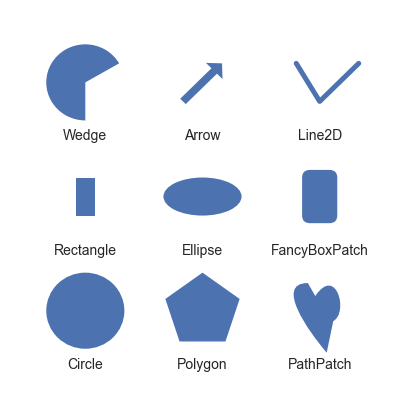

In [9]:
"""
Show examples of matplotlib artists

Several examples of standard matplotlib graphics primitives (artists)
are drawn using matplotlib API. Full list of artists and the
documentation is available at
https://matplotlib.org/stable/api/artist_api.html
"""

from matplotlib.collections import PatchCollection
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, 1, figsize=(7,7))

# create 3x3 grid to plot the artists
pos = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1)
patches = []

# add a circle
art = mpatches.Circle(pos[:, 0], 0.1, ec="none")
patches.append(art)
plt.text(pos[0, 0], pos[1, 0] - 0.15, "Circle", ha="center", size=14)

# add a rectangle
art = mpatches.Rectangle(pos[:, 1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(art)
plt.text(pos[0, 1], pos[1, 1] - 0.15, "Rectangle", ha="center", size=14)

# add a wedge
wedge = mpatches.Wedge(pos[:, 2], 0.1, 30, 270, ec="none")
patches.append(wedge)
plt.text(pos[0, 2], pos[1, 2] - 0.15, "Wedge", ha="center", size=14)

# add a Polygon
polygon = mpatches.RegularPolygon(pos[:, 3], 5, 0.1)
patches.append(polygon)
plt.text(pos[0, 3], pos[1, 3] - 0.15, "Polygon", ha="center", size=14)

#add an ellipse
ellipse = mpatches.Ellipse(pos[:, 4], 0.2, 0.1)
patches.append(ellipse)
plt.text(pos[0, 4], pos[1, 4] - 0.15, "Ellipse", ha="center", size=14)

#add an arrow
arrow = mpatches.Arrow(pos[0, 5] - 0.05, pos[1, 5] - 0.05, 0.1, 0.1, width=0.1)
patches.append(arrow)
plt.text(pos[0, 5], pos[1, 5] - 0.15, "Arrow", ha="center", size=14)

# add a path patch
Path = mpath.Path
verts = np.array([
     (0.158, -0.257),
     (0.035, -0.11),
     (-0.175, 0.20),
     (0.0375, 0.20),
     (0.085, 0.115),
     (0.22, 0.32),
     (0.3, 0.005),
     (0.20, -0.05),
     (0.158, -0.257),
    ])
verts = verts - verts.mean(0)
codes = [Path.MOVETO,
         Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.LINETO,
         Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CLOSEPOLY]

path = mpath.Path(verts / 2.5 + pos[:, 6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
plt.text(pos[0, 6], pos[1, 6] - 0.15, "PathPatch", ha="center", size=14)

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
        pos[:, 7] - [0.025, 0.05], 0.05, 0.1,
        boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
plt.text(pos[0, 7], pos[1, 7] - 0.15, "FancyBoxPatch", ha="center", size=14)

# add a line
x,y = np.array([[-0.06, 0.0, 0.1], [0.05,-0.05, 0.05]])
line = mlines.Line2D(x+pos[0, 8], y+pos[1, 8], lw=5.)
plt.text(pos[0, 8], pos[1, 8] - 0.15, "Line2D", ha="center", size=14)

collection = PatchCollection(patches)
ax.add_collection(collection)
ax.add_line(line)
ax.set_axis_off()

plt.show()

Containers are objects like *Figure* and *Axes*. Containers are given primitives to draw. The plotting functions we discussed back in Parts 1 & 2 are convenience functions that generate these primitives and places them into the appropriate containers. In fact, most of those functions will return artist objects (or a list of artist objects) as well as store them into the appropriate axes container.

As discussed in Part 3, there is a wide range of properties that can be defined for your plots.  These properties are processed and applied to their primitives. Ultimately, you can override anything you want just by directly setting a property to the object itself.

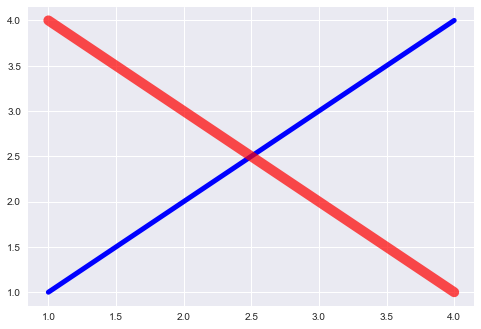

In [10]:
fig, ax = plt.subplots(1, 1)
lines = plt.plot([1, 2, 3, 4], [1, 2, 3, 4], 'b', [1, 2, 3, 4], [4, 3, 2, 1], 'r')
lines[0].set(linewidth=5)
lines[1].set(linewidth=10, alpha=0.7)
plt.show()

To see what properties are set for an artist, use [`getp()`](https://matplotlib.org/api/artist_api.html#functions)

In [11]:
fig = plt.figure()
print(plt.getp(fig.patch))
plt.close(fig)

    agg_filter = None
    alpha = None
    angle = 0.0
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = CapStyle.butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=576.0, y1=396.0)
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(576x396)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = JoinStyle.miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = False
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTr

# Collections
In addition to the Figure and Axes containers, there is another special type of container called a [`Collection`](http://matplotlib.org/api/collections_api.html). A Collection usually contains a list of primitives of the same kind that should all be treated similiarly. For example, a [`CircleCollection`](http://matplotlib.org/api/collections_api.html#matplotlib.collections.CircleCollection) would have a list of [`Circle`](https://matplotlib.org/api/_as_gen/matplotlib.patches.Circle.html) objects all with the same color, size, and edge width. Individual property values for artists in the collection can also be set (in some cases).

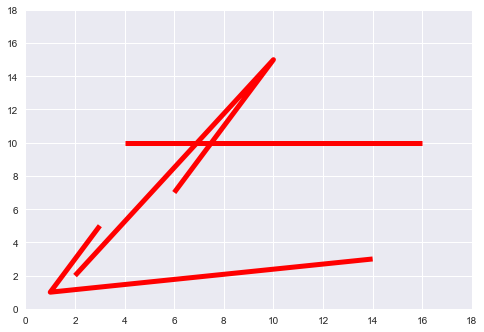

In [12]:
from matplotlib.collections import LineCollection
fig, ax = plt.subplots(1, 1)
# A collection of 3 lines
lc = LineCollection([[(4, 10), (16, 10)],
                     [(2, 2), (10, 15), (6, 7)],
                     [(14, 3), (1, 1), (3, 5)]])
lc.set_color('r')
lc.set_linewidth(5)
ax.add_collection(lc)
ax.set_xlim(0, 18)
ax.set_ylim(0, 18)
plt.show()

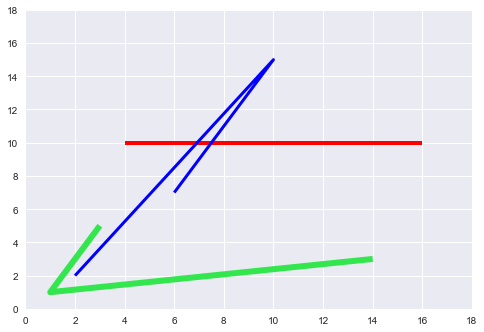

In [13]:
# Now set individual properties in a collection
fig, ax = plt.subplots(1, 1)
lc = LineCollection([[(4, 10), (16, 10)],
                     [(2, 2), (10, 15), (6, 7)],
                     [(14, 3), (1, 1), (3, 5)]])
lc.set_color(['r', 'blue', (0.2, 0.9, 0.3)])
lc.set_linewidth([4, 3, 6])
ax.add_collection(lc)
ax.set_xlim(0, 18)
ax.set_ylim(0, 18)
plt.show()

There are other kinds of collections that are not just simply a list of primitives, but are Artists in their own right. These special kinds of collections take advantage of various optimizations that can be assumed when rendering similar or identical things. You use these collections all the time whether you realize it or not! Markers are implemented this way (so, whenever you do `plot()` or `scatter()`, for example).

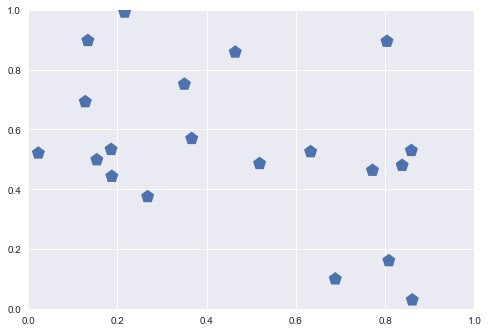

In [14]:
from matplotlib.collections import RegularPolyCollection

fig, ax = plt.subplots(1, 1)
offsets = np.random.rand(20, 2)
collection = RegularPolyCollection(
    numsides=5,  # a pentagon
    sizes=(150,),
    offsets=offsets,
    transOffset=ax.transData,
    )
ax.add_collection(collection)
plt.show()